# Creating a Quantum Circuit Simulator from scratch

Note: This module assumes that you are familiar with basic quantum gates and the qiskit simulator.

In this module I'm just attempting to create a simple quantum circuit simulator inspired by the qiskit simulator. I've Implemented most of the well known gates as a part of the simulator. 

In [1]:
!pip install qiskit

     |████████████████████████████████| 8.5MB 4.0MB/s 
     |████████████████████████████████| 17.6MB 259kB/s 
     |████████████████████████████████| 204kB 63.9MB/s 
     |████████████████████████████████| 204kB 67.2MB/s 
     |████████████████████████████████| 2.1MB 62.3MB/s 
     |████████████████████████████████| 1.3MB 56.7MB/s 
     |████████████████████████████████| 5.9MB 49.2MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 194kB 51.9MB/s 
     |████████████████████████████████| 81kB 11.4MB/s 
     |████████████████████████████████| 583kB 40.0MB/s 
     |████████████████████████████████| 102kB 13.0MB/s 
     |████████████████████████████████| 3.2MB 49.3MB/s 
     |████████████████████████████████| 5.5MB 48.4MB/s 
  Created wheel for qiskit: filename=qiskit-0.23.6-cp36-none-any.whl size=2883 sha256=546a2b662a2f289961f38105c82a8749fcf88988c43ac62262bd8057231cde94
  Stored in directory: /root/.cache/pip/wheels/b1/5e/2a/a9afb84cb4e8a

Imorting the required libraries

In [2]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

import qiskit

In [18]:
def x(): #defining the pauli X gate which is [[0,1]
                                      # [1,0]]
    return np.array([[0.0,1.0],[1.0,0.0]], dtype = 'complex') 

def y(): #the pauli Y gate
    return np.array([[0.0,-1.0j],[1.0j,0.0]], dtype = 'complex')

def z(): #the pauli Z gate
    return np.array([[1.0,0.0],[0.0,-1.0]], dtype = 'complex')

def h(): #the Hadamard gate
    return np.sqrt(1/2)*np.array([[1.0,1.0],[1.0,-1.0]], dtype = 'complex')

def s(): #the Phase gate
    return np.array([[1.0,0.0],[0.0,1.0j]], dtype = 'complex')

def t(): #the T gate
    return np.array([[1,0],[0,np.exp(1.0j*np.pi/4)]], dtype = 'complex')

def projections(): #the Projection Operators
    projection_0 = np.array([[1,0],[0,0]], dtype = 'complex')
    projection_1 = np.array([[0,0],[0,1]], dtype = 'complex')
    return (projection_0, projection_1)
def U3(theta, phi, lambda_):
    a = math.cos(theta / 2)
    b = -math.e**(complex(0, lambda_)) * math.sin(theta / 2)
    c = math.e**(complex(0, phi)) * math.sin(theta / 2)
    d = math.e**(complex(0, lambda_ + phi)) * math.cos(theta / 2)
    return np.array([
        [a, b],
        [c, d]
        ])

I = np.eye(2)

I've written the gates as functions and not variables because I don't want to confuse the users and also because if the user unknowingly uses one of the variables as a symbol, the data will be overwritten

In [19]:
def get_ground_state(num_qubits):
      # return vector of size 2**num_qubits with all zeroes except first element which is 1
    q = np.zeros(2**num_qubits)
    q[0] = 1
    return q



def get_operator(total_qubits, gate_string, target_qubits, params = None):
  # return unitary operator of size 2**n x 2**n for given gate and target qubits
    if (len(target_qubits) == 1):
        if params is None: #if there are no parameters, then it's not a u3 gate
            gate = I
            if (gate_string == 'x'): gate = x() #checking which gate was requested
            elif (gate_string == 'y'): gate = y()
            elif (gate_string == 'z'): gate = z()
            elif (gate_string == 'h'): gate = h()
            elif (gate_string == 's'): gate = s()
            elif (gate_string == 't'): gate = t()
            
            operator_used = np.zeros(total_qubits) 
            operator_used[target_qubits[0]] = 1 #setting the target_qubits to 1 so that the gate can be applied to them
            final_op = I
            if (operator_used[0] == 1): 
                final_op = gate

            for i in range(1, total_qubits):
                if (operator_used[i] == 0): 
                    final_op = np.kron(final_op, I) #if it's not a traget qubit, then we use I, else we use the gate
                else : 
                    final_op = np.kron(final_op, gate)
            return final_op
        else : #applying the u3 gate
            if gate_string != "u3":
                print("please don't enter any parameters")
            theta = float(params[0])
            phi = float(params[1])
            lambda_ = float(params[2])
            gate = U3(theta, phi, lambda_)
            operator_used = np.zeros(total_qubits)
            operator_used[target_qubits[0]] = 1
            final_op = I
            if (operator_used[0] == 1): 
                final_op = gate

            for i in range(1, total_qubits):
                if (operator_used[i] == 0): 
                    final_op = np.kron(final_op, I)
                else : 
                    final_op = np.kron(final_op, gate)
            return final_op
            
    
    else :
        gate = I
        if (gate_string == 'cx'): gate = x()
        elif (gate_string == 'cz'): gate = z()
        elif (gate_string == 'cy'): gate = y()
        control_bit = target_qubits[0]
        target_bit = target_qubits[1]
        if control_bit == target_bit:
            print("Error: The Control bit and The Target bit are the same, please enter the different values")
            return
        operator_used = np.zeros(total_qubits)
        operator_used[control_bit] = 1
        operator_used[target_bit] = 2
        left_tensor = I
        right_tensor = I
        
        if operator_used[0] == 1:
            left_tensor = projections()[0]
            right_tensor = projections()[1]
        elif operator_used[0] == 2:
            right_tensor = gate

        for i in range(1, total_qubits):
            if (operator_used[i] == 0): 
                left_tensor = np.kron(left_tensor, I)
                right_tensor = np.kron(right_tensor, I)
            elif (operator_used[i] == 1): 
                left_tensor = np.kron(left_tensor, projections()[0])
                right_tensor = np.kron(right_tensor, projections()[1])
            else :
                left_tensor = np.kron(left_tensor, I)
                right_tensor = np.kron(right_tensor, gate)
        
        
        return left_tensor + right_tensor
        

    

def run_program(initial_state, program):
  # read program, and for each gate:
  #   - calculate matrix operator
  #   - multiply state with operator
  # return final state
    qubits = int(math.log2(len(initial_state)))
    for i in range(0, len(program)):
        if len(program[i]["params"]) == 3:
            initial_state = np.dot(initial_state, get_operator(qubits, program[i]["gate"], program[i]["target"], program[i]["params"]))
        else:
            initial_state = np.dot(initial_state, get_operator(qubits, program[i]["gate"], program[i]["target"]))
    return initial_state

def measure_all(state_vector):
  # choose element from state_vector using weighted random and return it's index
    qubits = int(math.log2(len(state_vector)))
    index = ["" for x in range(len(state_vector))]
    probabilities = [abs(i)**2 for i in state_vector]
    for i in range(0, len(index)):
        index[i] = str(format(i, '00' + str(qubits) + 'b'))
    return random.choices(index, probabilities)[0]

def get_counts(state_vector, num_shots):
  # simply execute measure_all in a loop num_shots times and
  # return object with statistics in following form:
  #   {
  #      element_index: number_of_ocurrences,
  #      element_index: number_of_ocurrences,
  #      element_index: number_of_ocurrences,
  #      ...
  #   }
  # (only for elements which occoured - returned from measure_all)
    
    bin_index = ["" for x in range(len(state_vector))]
    qubits = int(math.log2(len(state_vector)))
    for i in range(0, len(bin_index)):
        bin_index[i] = str(format(i, '00' + str(qubits) + 'b'))
    
    values = {}
    
    for i in range(0, len(bin_index)):
        values[bin_index[i]]=0
    
    for i in range(0, num_shots):
        values[measure_all(state_vector)] +=1

    for i in range(0, len(bin_index)):
        if(values[bin_index[i]]==0):
            del(values[bin_index[i]])
    
    return values



In [20]:
# Define program:

my_circuit = [
{ "gate": "h", "target": [0], "params": [] }, 
{ "gate": "cx", "target": [0, 1], "params": [] },
{ "gate": "u3", "target": [0], "params":[50, 0, 0] }
]


# Create "quantum computer" with 2 qubits (this is actually just a vector :) )

my_qpu = get_ground_state(2)


# Run circuit

final_state = run_program(my_qpu, my_circuit)


# Read results

counts = get_counts(final_state, 1000)

print(counts)


{'00': 490, '01': 9, '10': 6, '11': 495}


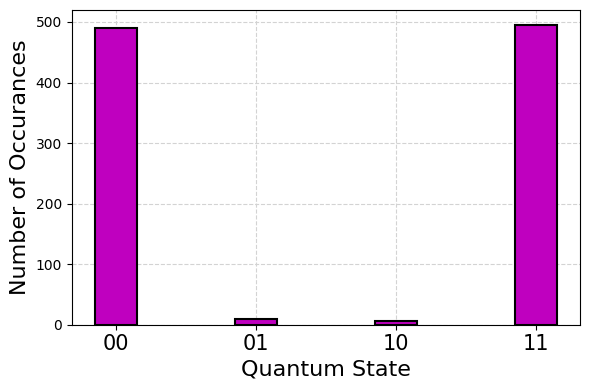

In [28]:
fig, ax = plt.subplots(1,1,dpi=100)
plt.bar(*zip(*counts.items()),color='m',width=0.3,edgecolor='black',linewidth=1.5)
x_ticks_labels = counts.keys()
ax.set_xticklabels(x_ticks_labels, fontsize=15)
ax.set_xlabel("Quantum State",fontsize=16)
ax.set_ylabel("Number of Occurances",fontsize=16)
ax.set_axisbelow(True)
ax.grid(linestyle='--',color='lightgray',zorder=0)
fig.tight_layout()